### Задача 1 (Про градиентный спуск)
Сравнить сложность точного решения задачи линейной регрессии для случая квадратичной ошибки и сложность решения этой же задачи методом градиентного спуска (при условии, что градиентный спуск сходится с K шагов, в задаче есть M признаков и длина обучающей выборки равна N. N>K и N>M)

Линейная регрессия: 
$$y_i = \sum_{j=1}^dX_{i,j}w_j + w_0 + \epsilon_i$$
Тогда задача линейной регресси для случая квадратичной ошибки заключается в поиске вектора $w$: 
$$
    \arg \min_{w}L(w, X, y) = \frac{1}{n}\sum_{i=1}^n(\check{y}_i - y_i)^2 = \frac{1}{n}\sum_{i=1}^n((\langle X_i, w\rangle + b) - y_i)^2
$$
Тогда если добавить константный предиктор = 1 к остальным предикторам, получим:
$$
    \arg \min_{w}L(w, X, y) = \frac{1}{n}\|Xw - y\|_2^2
$$
Откуда найдем $\nabla_w L$:
$$
    d_w[L(w, X, y)] = d_w[\frac{1}{n}\|Xw - y\|_2^2]=\frac{1}{n}d_w[(Xw-y)^T(Xw-y)]=\frac{1}{n}(d_w[(Xw-y)^T](Xw-y) + (Xw-y)^Td_w[(Xw-y)])=
$$
$$
= \frac{1}{n}((d_w[Xw-y])^T(Xw-y) + (Xw-y)^Td_w[(Xw-y)]) = \frac{1}{n}((Xdw)^T(Xw-y) + (Xw-y)^TXdw) = \frac{2}{n}(Xw-y)^TXdw
$$
Таким образом:
$$
d_w[L(w, X, y)] = \frac{2}{n}(Xw-y)^TXdw
$$
$$
\nabla_w L(w, X, y) = \frac{2}{n}X^T(Xw-y)
$$


#### Пункт 1 (сложность решения аналитическим методом)

Приравняем $\nabla_w L = 0$ и найдем аналитическое решение для w:
$$
\frac{2}{n}X^T(Xw-y) = 0
$$
$$
X^TXw=X^Ty
$$
$$
w = (X^TX)^{-1}X^Ty
$$
Немного вычислительной сложности в общем виде:
1. $X^T = O(nk)$
1. $X^{-1} = O(n^3)$
1. $\underset{p \times n}{Y}\underset{n\times k}{X} = O(2nkp) = O(nkp)$ 

Откуда получаем что сложность аналитического решения для регрессии с квадратичной ошибкой, где $\underset{n\times m}{X}$
1. $X^TX = O(nk^2)$
1. $(X^TX)^{-1} = O(k^3)$
1. $X^Ty = O(nm)$
$$
T(n, m) = nm^2 + m^3 + nm^2 + nm = 2nm^2 + m^3 + nm = O(nm^2 + m^3)
$$
Если перемножать сначала $X^Ty$, то будет несколько меньше операций
$$
T(n, m) = nm^2 + m^3 + nm + nm = nm^2 + m^3 + 2mn = O(nm^2 + m^3)
$$

#### Пункт 2 (сложность решения градиентным спуском)

Для градиентного метода веса будут менятся по закону:
$$
w^{(i)} = w^{(i-1)} - \eta \nabla_w L(w^{(i-1)}, X, Y)
$$
$$
w^{(i)} = w^{(i-1)} - \eta \frac{2}{n} X^T(Xw-y)
$$
Тогда один шаг градиентного спуска имеет сложность:
$$
T(n, m) = m + 1 + m + nm + nm + n = O (nm)
$$
Если мы знаем, что оптимум $w^{*}$ достигается за k шагов, то сложность градиентного спуска:
$$
T(n, m, k) = O(nmk)
$$

Откуда можно сделать вывод что вычислительная сложность для градиентного спуска в линейной регрессии значительно ниже чем аналитическое решение (для разумного k и реализации конечно же)

### Задача 2 (Про [FWL-Теорему](https://en.wikipedia.org/wiki/Frisch%E2%80%93Waugh%E2%80%93Lovell_theorem))
Возьмите данные c kaggle, например [отсюда](https://www.kaggle.com/code/malakalaabiad/house-prices-techniques/input) и удостоверьтесь, что FWL-теорема работает, но только не для случая одной переменной

По сути теорема о том, что если присмотреться к задаче регрессии $Y=Xw$, то $Y$ является линейной комбинацией столбцов $X$, что с точки зрения линейной алгебры является проекцией $Y$ на подпространство, образованное столбцами $X$. 

FWL - теорема же говорит о том, что можно разделить регрессоры на группы $(X_1,X_2)$. Затем через выделение ортогонального дополненния ($M_{X_1}Y$, $M_{X_1}X_2$) одних регрессоров на другие оценить коэфициенты полученной регрессии.
$$
M_{X_1}Y = M_{X_1}X_2 \beta_2 + M_{X_1}u
$$
При этом полученные оценки на коэфициенты останутся теми же, что и в исходной регрессии
$$
Y = X_1\beta_1 + X_2\beta_2 + u
$$

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from scipy.special import ive
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('boston.csv')
df = df.drop(columns=['CHAS', 'RAD'])
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


Разделим предикторы на 2 группы

In [3]:
Y = df.iloc[:,-1]
X_all = df.iloc[:,:-1]
X_1 = df.iloc[:,:5]
X_2 = df.iloc[:,5:-1]

Посчитаем коэфициенты в обычной регрессии

In [4]:
model = sm.OLS(Y, X_all).fit()
reg_params = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1018.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                        0.00
Time:                        22:33:37   Log-Likelihood:                         -1533.1
No. Observations:                 506   AIC:                                      3088.
Df Residuals:                     495   BIC:                                      3135.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0725      0.034     -2.146      0.032      -0.139      -0.006
ZN             0.0445      0.015      3.063      0.002       0.016       0.073
INDUS         -0.0331      0.063     -0.526      0.599      -0.156       0.090
NOX           -2.3584      3.408     -0.692      0.489      -9.055       4.338
RM             5.9461      0.313     19.005      0.000       5.331       6.561
AGE           -0.0071      0.014     -0.509      0.611      -0.035       0.020
DIS           -1.0477      0.197     -5.316      0.000      -1.435      -0.660
TAX           -0.0019      0.002     -0.785      0.433      -0.007       0.003
PTRATIO       -0.4213      0.111     -3.791      0.000      -0.640      -0.203
B              0.0141      0.003      5.243      0.000       0.009       0.019
LSTAT         -0.4338      0.051     -8.431      0.000      -0.535      -0.333
==============================================================================
Omnibus:                      223.506   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1524.770
Skew:                           1.794   Prob(JB):                         0.00
Kurtosis:                      10.710   Cond. No.                     8.48e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Посчитаем проекцию $Y$ на ортогональное дополнение к регрессорам $X_1$, а затем для группы регрессоров $X_2$ найдем ортогональные дополнения к регрессорам $X_1$

In [5]:
model_X_1 = sm.OLS(Y, X_1).fit()
orthogonal_complement_Y_to_X_1 = Y - model_X_1.predict(X_1)
model_X_2_to_X_1 = sm.OLS(X_2, X_1).fit()
for value in X_2.columns:
    projection_model = sm.OLS(X_2[value], X_1).fit()
    orthogonal_complement = X_2[value] - projection_model.predict(X_1)
    X_2[value] = orthogonal_complement

/var/folders/tk/yyvw73cn5pb00ymf5kkn6gn80000gn/T/ipykernel_69329/2300681376.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2[value] = orthogonal_complement


Посчитаем коэфициент в регрессии ортогонального дополнения $X_2$ к $X_1$ на ортогональное дополнение $Y$ к $X_1$

In [6]:
projection_Y_on_X_2 = sm.OLS(orthogonal_complement_Y_to_X_1, X_2).fit()
projection_params = projection_Y_on_X_2.params
projection_Y_on_X_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              46.20
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                    5.28e-45
Time:                        22:33:37   Log-Likelihood:                         -1533.1
No. Observations:                 506   AIC:                                      3078.
Df Residuals:                     500   BIC:                                      3103.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0071      0.014     -0.512      0.609      -0.035       0.020
DIS           -1.0477      0.196     -5.342      0.000      -1.433      -0.662
TAX           -0.0019      0.002     -0.789      0.430      -0.007       0.003
PTRATIO       -0.4213      0.111     -3.810      0.000      -0.639      -0.204
B              0.0141      0.003      5.269      0.000       0.009       0.019
LSTAT         -0.4338      0.051     -8.473      0.000      -0.534      -0.333
==============================================================================
Omnibus:                      223.506   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1524.770
Skew:                           1.794   Prob(JB):                         0.00
Kurtosis:                      10.710   Cond. No.                         93.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Чудо, все коэфициенты совпали с изначальной регрессией

In [7]:
np.allclose(projection_params.to_numpy(), reg_params[5:].to_numpy())

True

### Задача 3 (Про эквивалентность или не эквивалентность разных методов подсчета квантилей)
Сгенерируйте 2 выборки длины ,например, 10000 из:

Нормального
Логнормального
Экспоненциального
Распределений с наперед заданными параметрами, так чтобы вы могли однозначно посчитать разницу медиан (используя теорвер и википедию)

Проверьте, какой по этим выборкам будет получаться 95% доверительный интервал на разницу медиан, если его посчитать с помощью:

1. Бутстрепа
1. [Подгонки](https://engineering.atspotify.com/2022/03/comparing-quantiles-at-scale-in-online-a-b-testing/) от Spotify
1. [Подгонки](https://www.evanmiller.org/bootstrapping-sample-medians.html) результатов бутстрепа от Эвана Миллера
1. [Метода Прайса-Боннетта](https://www.tandfonline.com/doi/abs/10.1080/00949650212140)

Что вы можете сказать о работоспособности методов?
(можно попробовать подать на вход какие-то другие распределения, как бы провести "стресс-тест" метода)

In [8]:
def poisson_bootstrap(sample_1, sample_2, q=.5, alpha=.05, size=1000, seed=None):
    statistics = []
    rng = np.random.default_rng(seed)
    weights_1 = rng.poisson(lam=1, size=(size, len(sample_1)))
    weights_2 = rng.poisson(lam=1, size=(size, len(sample_2)))
    for w_1, w_2 in zip(weights_1, weights_2):
        statistics.append(np.quantile(np.repeat(sample_1, w_1), q) - np.quantile(np.repeat(sample_2, w_2), q))
    pe = np.quantile(sample_1, q) - np.quantile(sample_2, q)
    low_b, up_b = np.quantile(statistics, [(alpha / 2), 1 - (alpha / 2)])
    return statistics, pe, low_b, up_b

In [9]:
def spotify_estimation(sample_1, sample_2, q=.5, alpha=.05, size=1000, seed=None):
    sorted_sample_1 = np.sort(sample_1)
    sorted_sample_2 = np.sort(sample_2)
    rng = np.random.default_rng(seed)
    boot_sample_1 = rng.binomial(len(sorted_sample_1)+1, q, size=size)
    boot_sample_2 = rng.binomial(len(sorted_sample_2)+1, q, size=size)
    diff_dist = sorted_sample_1[boot_sample_1] - sorted_sample_2[boot_sample_2]
    pe = np.quantile(sorted_sample_1, q) - np.quantile(sorted_sample_2, q)
    low_b, up_b = np.quantile(diff_dist, [(alpha / 2), 1 - (alpha / 2)])
    return diff_dist, pe, low_b, up_b

In [10]:
from scipy.stats.sampling import DiscreteGuideTable

def approx_bessel(i, n):
    z = 2 * np.sqrt((n + 1 - i) * (i))
    return 2 * np.exp(z-n-1) * ive(0, z)

def bessel_pv(size):
    size = size + 1
    pv = []
    for i in range(size):
        pv.append(approx_bessel(i, size))
    return pv

def evan_miller_median(sample_1, sample_2, alpha=.05, size=1000, seed=None):
    sorted_sample_1 = np.sort(sample_1)
    sorted_sample_2 = np.sort(sample_2)
    rng = np.random.default_rng(seed)
    dist_1 = DiscreteGuideTable(bessel_pv(len(sample_1)), random_state=rng)
    dist_2 = DiscreteGuideTable(bessel_pv(len(sample_2)), random_state=rng)
    boot_sample_1 = dist_1.rvs(size=size)
    boot_sample_2 = dist_2.rvs(size=size)
    diff_dist = sorted_sample_1[boot_sample_1] - sorted_sample_2[boot_sample_2]
    pe = np.median(sorted_sample_1) - np.median(sorted_sample_2)
    low_b, up_b = np.quantile(diff_dist, [(alpha / 2), 1 - (alpha / 2)])
    return diff_dist, pe, low_b, up_b


Визуализируем распределение Беселевской аппроксимации реаспределения вероятностей над рангами для медианы и семплированную выюорку из этого распределения. (Для общего понимания)

Text(0.5, 1.0, 'sample hist')

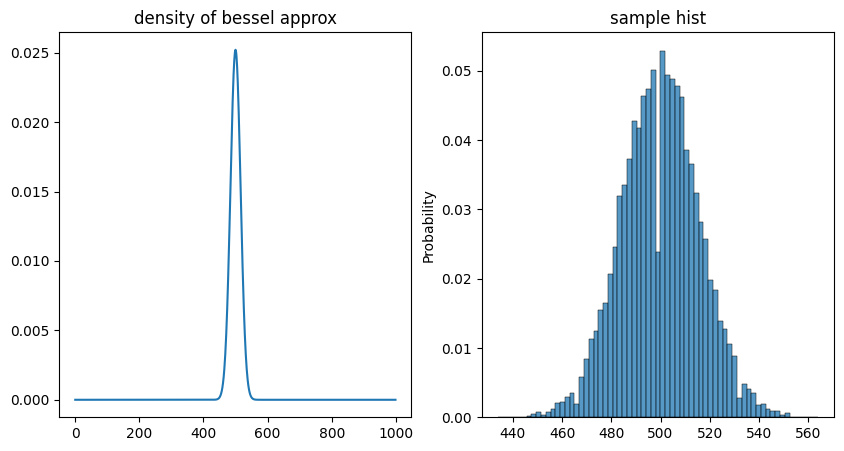

In [11]:
rng = np.random.default_rng(42)
s = rng.lognormal(1, 1, 1000)
dist = np.array([approx_bessel(i, len(s) + 1) for i in range(1, len(s) + 1)])
dist = DiscreteGuideTable(dist, random_state=rng)
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
sns.lineplot(np.array([approx_bessel(i, len(s) + 1) for i in range(1, len(s) + 1)]), ax=ax[0])
sns.histplot(dist.rvs(10000), ax=ax[1], stat='probability')
ax[0].set_title('density of bessel approx')
ax[1].set_title('sample hist')

In [12]:
def price_bonet(sample_1, sample_2, alpha=.05):
    sample_1 = np.sort(sample_1)
    sample_2 = np.sort(sample_2)
    get_c = lambda size: int(np.round(((size + 1) / 2) - (size ** (1/2))))
    c_1 = get_c(len(sample_1))
    c_2 = get_c(len(sample_2))
    var_1 = ((sample_1[len(sample_1) - c_1] - sample_1[c_1]) / 4) ** 2
    var_2 = ((sample_2[len(sample_2) - c_2] - sample_2[c_2]) / 4) ** 2
    diff_med = np.median(sample_1) - np.median(sample_2)
    low_b = diff_med - stats.norm.ppf(1 - (alpha/2)) * (var_1 + var_2) ** (1 / 2)
    up_b = diff_med + stats.norm.ppf(1 - (alpha/2)) * (var_1 + var_2) ** (1 / 2)
    return diff_med, low_b, up_b

#### Проведем тесты методов оценки разности медиан

Сгенерируем выборки для логнормального распределения и подсчитаем аналитическую разность медиан.
1. sample_1 = $LnN(2, \frac{1}{4})$
1. sample_2 = $LnN(0, 4)$
$$
median(LnN(\mu, \sigma^2)) = \exp(\mu)
$$
$$
    diff = \exp(2) - \exp(0) = 6.389
$$

In [13]:
rng = np.random.default_rng(42)
sample_1 = rng.lognormal(2, 1 / 2, size=10000)
sample_2 = rng.lognormal(0, 2, size=10000)
diff = np.exp(2) - np.exp(0)

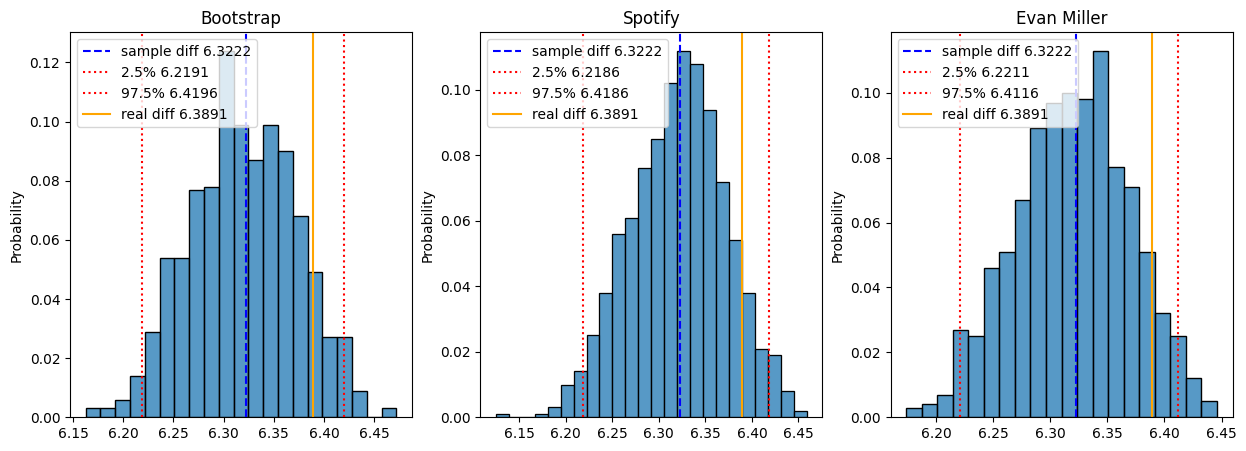

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
distances = []
diff_dist, pe, low_b, up_b = poisson_bootstrap(sample_1, sample_2)
sns.histplot(diff_dist, stat="probability", ax=ax[0])
ax[0].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[0].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[0].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[0].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[0].set_title('Bootstrap')
ax[0].legend()
distances.append(up_b-low_b)
diff_dist, pe, low_b, up_b = spotify_estimation(sample_1, sample_2)
sns.histplot(diff_dist, stat="probability", ax=ax[1])
ax[1].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[1].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[1].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[1].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[1].set_title('Spotify')
ax[1].legend()
distances.append(up_b-low_b)
diff_dist, pe, low_b, up_b = evan_miller_median(sample_1, sample_2)
sns.histplot(diff_dist, stat='probability', ax=ax[2])
ax[2].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[2].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[2].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[2].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[2].set_title('Evan Miller')
ax[2].legend()
distances.append(up_b-low_b)

In [15]:
pe, low_b, up_b = price_bonet(sample_1, sample_2)
distances.append(up_b - low_b)
print(f'Price Bonet: разница медиан {pe:.4f}, нижняя граница {low_b:.4f}, верхняя граница {up_b:.4f}, реальная разность: {diff:.4f}')

Price Bonet: разница медиан 6.3222, нижняя граница 6.2244, верхняя граница 6.4201, реальная разность: 6.3891


In [16]:
print(f"Bootstrap: {distances[0]}, Spotify {distances[1]}, Evan Miller {distances[2]}, Price Bonnet {distances[3]}")

Bootstrap: 0.20052699395433837, Spotify 0.20006456533308636, Evan Miller 0.19053082499234186, Price Bonnet 0.19568848316758825


Сгенерируем выборки для нормального распределения и подсчитаем аналитическую разность медиан.
1. sample_1 = $N(2, \frac{1}{4})$
1. sample_2 = $N(0, 4)$
$$
median(N(\mu, \sigma^2)) = \mu
$$
$$
    diff = 2 - 0 = 2
$$

In [17]:
rng = np.random.default_rng(42)
sample_1 = rng.normal(2, 1/2, size=10000)
sample_2 = rng.normal(0, 2, size=10000)
diff = 2 - 0

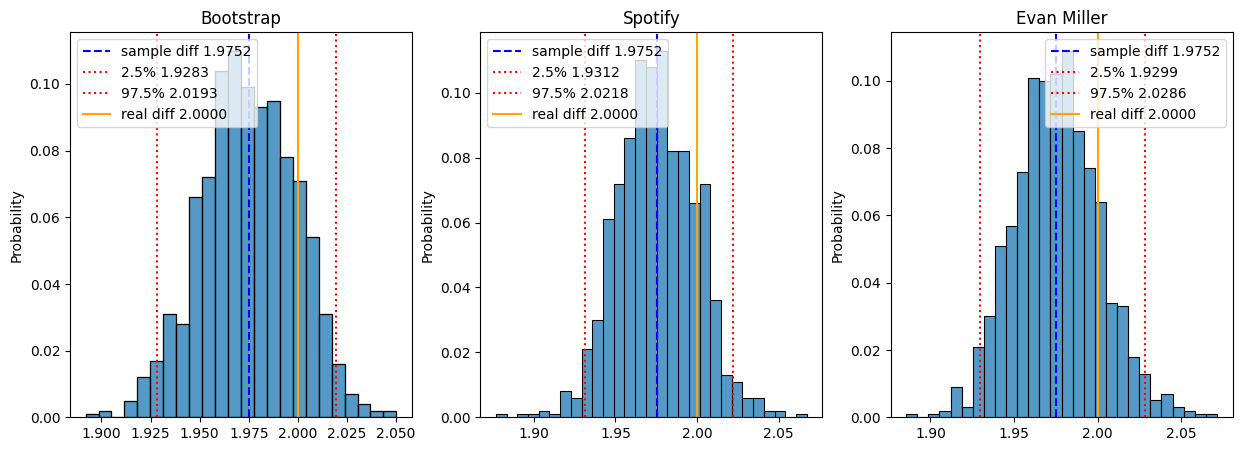

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
distances = []
diff_dist, pe, low_b, up_b = poisson_bootstrap(sample_1, sample_2)
sns.histplot(diff_dist, stat="probability", ax=ax[0])
ax[0].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[0].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[0].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[0].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[0].set_title('Bootstrap')
ax[0].legend()
distances.append(up_b - low_b)
diff_dist, pe, low_b, up_b = spotify_estimation(sample_1, sample_2)
sns.histplot(diff_dist, stat="probability", ax=ax[1])
ax[1].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[1].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[1].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[1].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[1].set_title('Spotify')
ax[1].legend()
distances.append(up_b - low_b)
diff_dist, pe, low_b, up_b = evan_miller_median(sample_1, sample_2)
sns.histplot(diff_dist, stat='probability', ax=ax[2])
ax[2].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[2].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[2].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[2].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[2].set_title('Evan Miller')
ax[2].legend()
distances.append(up_b - low_b)

In [19]:
pe, low_b, up_b = price_bonet(sample_1, sample_2)
distances.append(up_b - low_b)
print(f'Price Bonet: разница медиан {pe:.4f}, нижняя граница {low_b:.4f}, верхняя граница {up_b:.4f}, реальная разность: {diff:.4f}')

Price Bonet: разница медиан 1.9752, нижняя граница 1.9288, верхняя граница 2.0217, реальная разность: 2.0000


In [20]:
print(f"Bootstrap: {distances[0]}, Spotify {distances[1]}, Evan Miller {distances[2]}, Price Bonnet {distances[3]}")

Bootstrap: 0.0909839686880165, Spotify 0.09056468437648513, Evan Miller 0.09867799178229952, Price Bonnet 0.09282594687642942


Сгенерируем выборки для экспоненциального распределения и подсчитаем аналитическую разность медиан. 
1. sample_1 = $Exp(\frac{1}{2})$
1. sample_2 = $Exp(2)$
$$
median(Exp(\lambda)) = \frac{\ln2}{\lambda}
$$
$$
    diff = \frac{\ln2}{0.5} - \frac{\ln2}{2} = 1.039721
$$

In [21]:
rng = np.random.default_rng(42)
sample_1 = rng.exponential(scale=2, size=10000)
sample_2 = rng.exponential(scale=0.5, size=10000)
diff = (np.log(2) / 0.5) - (np.log(2) / 2)

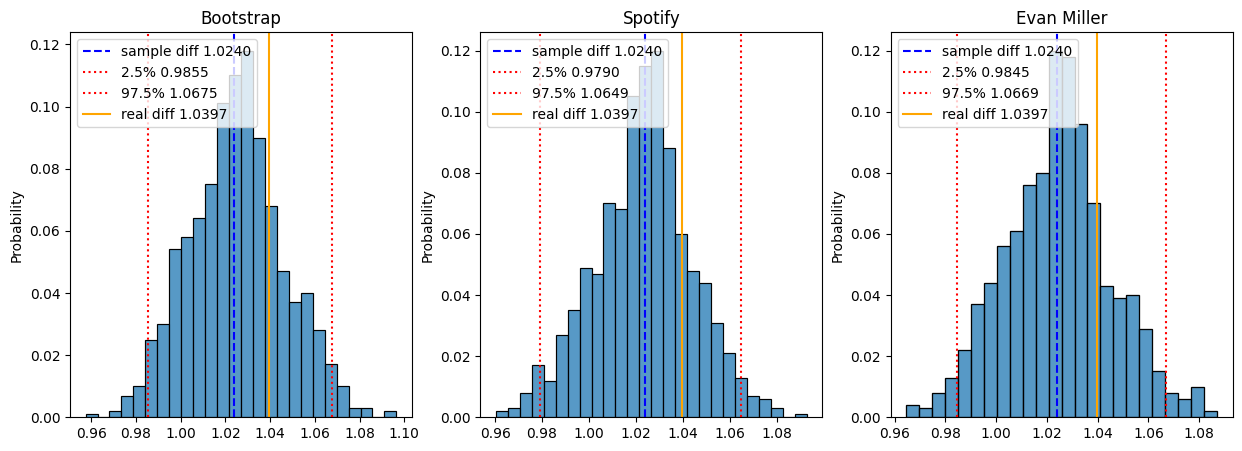

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
distances = []
diff_dist, pe, low_b, up_b = poisson_bootstrap(sample_1, sample_2)
sns.histplot(diff_dist, stat="probability", ax=ax[0])
ax[0].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[0].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[0].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[0].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[0].set_title('Bootstrap')
ax[0].legend()
distances.append(up_b - low_b)
diff_dist, pe, low_b, up_b = spotify_estimation(sample_1, sample_2)
sns.histplot(diff_dist, stat="probability", ax=ax[1])
ax[1].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[1].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[1].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[1].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[1].set_title('Spotify')
ax[1].legend()
distances.append(up_b - low_b)
diff_dist, pe, low_b, up_b = evan_miller_median(sample_1, sample_2)
sns.histplot(diff_dist, stat='probability', ax=ax[2])
ax[2].axvline(pe, color="blue", label=f"sample diff {pe:.4f}", linestyle="--")
ax[2].axvline(low_b, color="red", label=f"2.5% {low_b:.4f}", linestyle=":")
ax[2].axvline(up_b, color="red", label=f"97.5% {up_b:.4f}", linestyle=":")
ax[2].axvline(diff, color="orange", label=f"real diff {diff:.4f}", linestyle="-")
ax[2].set_title('Evan Miller')
ax[2].legend()
distances.append(up_b - low_b)

In [23]:
pe, low_b, up_b = price_bonet(sample_1, sample_2)
distances.append(up_b - low_b)
print(f'Price Bonet: разница медиан {pe:.4f}, нижняя граница {low_b:.4f}, верхняя граница {up_b:.4f}, реальная разность: {diff:.4f}')

Price Bonet: разница медиан 1.0240, нижняя граница 0.9826, верхняя граница 1.0654, реальная разность: 1.0397


In [24]:
print(f"Bootstrap: {distances[0]}, Spotify {distances[1]}, Evan Miller {distances[2]}, Price Bonnet {distances[3]}")

Bootstrap: 0.0820680527271862, Spotify 0.08590985451374955, Evan Miller 0.08238782563142377, Price Bonnet 0.08281474268419409


Как результат можно видеть, что все методы справляются с задачей оценки разности медиан в 2 выборках и построении доверительных интервалов на эту разность.

Однако по тесатм все же заметно, что метод Evan Miller, делает доверительные интервалы в среднем более узкими, чем остальные методы, однако является довольно запутанным в реализации и требует хранения распределения вероятностей в памяти для рассчетов, так же в минусы можно отнести возможность применения только на медианы.

Остальные методы в целом равны, субъективно самым оптимальным считаю подгонку от Spotify, через биномиальное распределение над рангами.